In [54]:
from signals import *
from plots import *
from solvers import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

## Ideas:
maybe gradient (or beta) should be weighted by the number of samples?

(4912, 7360, 3)


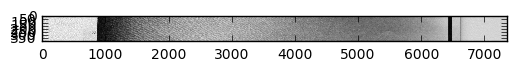

In [164]:
img=mpimg.imread('surface-images/small6.JPG')
print(img.shape)
img2 = img[2200:2600,:,0]
img1 = img[3200:3400,:,0]
imgplot = plt.imshow(img2, cmap='gray', interpolation='nearest')

def todegree(x):
    return x*180/np.pi

In [165]:
pattern = np.mean(img2,0)
pattern = pattern - min(pattern)
pattern = pattern/max(pattern)
bar = np.mean(img1,0)
bar = bar - min(bar)
bar = bar/max(bar)

In [166]:
coef = [10, 0,- 6, 0]
pol = SignalPolynomial(coef)
t = np.linspace(-0.8, 1, 100)
row = pol.get_samples(t).reshape(100,1)
row = row - np.min(row)
row = row/np.max(row)

(536,)


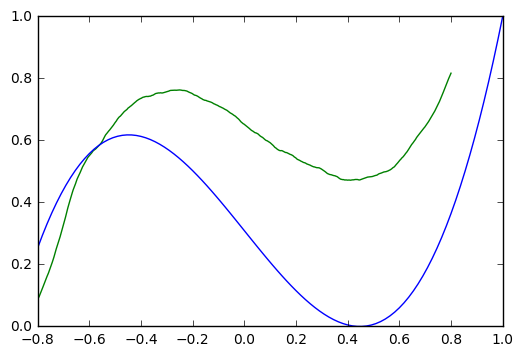

In [174]:
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import decimate

bar = bar[100:len(bar)-100]
pf = np.convolve(pattern, np.ones(100)/100, 'same')
# pf = gaussian_filter1d(pattern, sigma=10)
# pf = pattern
pf = pf[1::10]
pf = pf[100:-100]
print(pf.shape)
# plt.plot(np.linspace(-0.8,0.8,len(pattern)), pattern, label='pattern', color='y')
plt.plot(np.linspace(-0.8,0.8,len(pf)), pf, label='filtered',color='g')
plt.plot(t, row, label='orginal')
# pf = pf[int(len(pf)/2):]

force stop after 10000 steps
angle: -0.00985417938668 (-0.564602889421 deg )
[ 1.16101938 -0.59809642 -0.44095493  0.70477934]


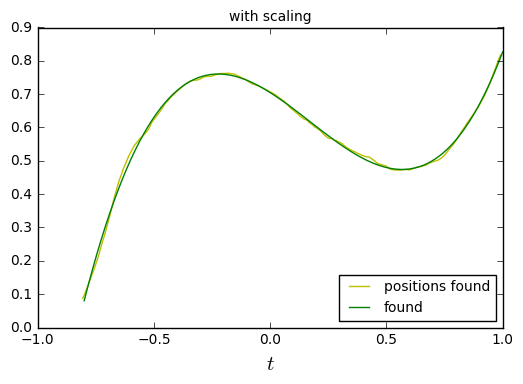

In [175]:
# pf = pf[int(len(pf)/2):]

solver = ConstrainedALS(
    pf,
    4,
    SecondSurfacePolynomial,
    start_pos=np.linspace(-0.8,1,len(pf)),
    stopping_error=1e-10,
    beta=1,
    show_plots=False,
    max_iter=10000,
    )
    
solver.solve()

# # print solver.train_error

# # print polynomial.square_error(SignalPolynomial(solver.parameter_estimate))
# pylab.ioff()
# # plot_results(SignalPolynomial(solver.parameter_estimate),'r',lw = 3)
pylab.plot(solver.get_position_estimates(),solver.get_samples(),'y',label="positions found")

print("angle:", solver.tr_param[0], "(" + str(todegree(solver.tr_param[0])) + " deg )" )
print(solver.parameter_estimate)
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
pylab.plot(t,polynomial.get_samples(t), color='g',label="found")
# pylab.plot(t,row,label="true")
pylab.title("with scaling", fontsize=10)
pylab.xlabel(r'$t$',fontsize=15)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()